# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [3]:
df_baverage = pd.read_csv('Dataset_inisiasi.csv')

In [4]:
df_baverage.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date,Cluster
0,ORD1729,CUS9213,B2C,Mango Juice,Juices,3.12,8,0.0,24.96,Bayern,2021-10-29,0
1,ORD2517,CUS7837,B2C,Selters,Water,0.47,15,0.0,7.05,Nordrhein-Westfalen,2022-04-08,0
2,ORD2474,CUS5123,B2C,Krombacher,Alcoholic Beverages,1.54,7,0.0,10.78,Brandenburg,2021-09-02,0
3,ORD1760,CUS5852,B2C,Pepsi,Soft Drinks,1.49,11,0.0,16.39,Baden-Württemberg,2021-12-14,0
4,ORD62,CUS2179,B2C,Sprite,Soft Drinks,0.53,10,0.0,5.30,Berlin,2021-06-02,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
label_encoder = LabelEncoder()

categorical_columns = ['Customer_Type', 'Product', 'Category', 'Region']
for column in categorical_columns:
    df_baverage[column] = label_encoder.fit_transform(df_baverage[column])


In [6]:
print(df_baverage.head())

  Order_ID Customer_ID  Customer_Type  Product  Category  Unit_Price  \
0  ORD1729     CUS9213              1       21         1        3.12   
1  ORD2517     CUS7837              1       37         3        0.47   
2  ORD2474     CUS5123              1       19         0        1.54   
3  ORD1760     CUS5852              1       28         2        1.49   
4    ORD62     CUS2179              1       38         2        0.53   

   Quantity  Discount  Total_Price  Region  Order_Date  Cluster  
0         8       0.0        24.96       1  2021-10-29        0  
1        15       0.0         7.05       9  2022-04-08        0  
2         7       0.0        10.78       3  2021-09-02        0  
3        11       0.0        16.39       0  2021-12-14        0  
4        10       0.0         5.30       2  2021-06-02        0  


In [7]:
scaler = MinMaxScaler()

numerical_columns = ['Customer_Type', 'Product', 'Category', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price', 'Region']

df_baverage[numerical_columns] = scaler.fit_transform(df_baverage[numerical_columns])

In [8]:
X = df_baverage.drop(columns=['Cluster', 'Customer_ID', 'Order_ID', 'Order_Date'])
y = df_baverage['Cluster']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(5588, 8), y_train=(5588,)
Test set shape: X_test=(1398, 8), y_test=(1398,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [10]:
print(df_baverage['Cluster'].unique())

[0 2 1]


In [11]:
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
lr = LogisticRegression().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [12]:
# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    """
    Fungsi untuk mengevaluasi model dan mengembalikan hasil dalam bentuk kamus.
    """
    # Prediksi menggunakan model
    y_pred = model.predict(X_test)
    
    # Matriks kebingungannya untuk multi-class
    cm = confusion_matrix(y_test, y_pred)
    
    # Hasil evaluasi untuk multi-class
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    
    return results



In [13]:

# Evaluasi setiap model
models = [knn, dt, rf, svm, nb, lr]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Logistic Regression']

results = []

for model, name in zip(models, model_names):
    evaluation_results = evaluate_model(model, X_test, y_test)
    results.append({
        'Model': name,
        'Accuracy': evaluation_results['Accuracy'],
        'Precision': evaluation_results['Precision'],
        'Recall': evaluation_results['Recall'],
        'F1-Score': evaluation_results['F1-Score']
    })

# Konversi ke DataFrame untuk perbandingan
df_comparison = pd.DataFrame(results)

# Tampilkan tabel perbandingan
print(df_comparison)


                 Model  Accuracy  Precision    Recall  F1-Score
0                  KNN  0.986409   0.985426  0.986409  0.985236
1        Decision Tree  1.000000   1.000000  1.000000  1.000000
2        Random Forest  1.000000   1.000000  1.000000  1.000000
3                  SVM  0.990701   0.990790  0.990701  0.989821
4          Naive Bayes  0.886266   0.972599  0.886266  0.921031
5  Logistic Regression  0.983548   0.982020  0.983548  0.981125



### 1. **KNN (K-Nearest Neighbors)**
   - **Accuracy**: 98.64%  
   - **Precision**: 98.54%  
   - **Recall**: 98.64%  
   - **F1-Score**: 98.52%  

   Model KNN menunjukkan akurasi yang sangat tinggi, dengan precision, recall, dan F1-Score yang hampir identik, yang mengindikasikan bahwa model ini cukup baik dalam mengklasifikasikan data dengan sangat sedikit kesalahan.

### 2. **Decision Tree**
   - **Accuracy**: 100%  
   - **Precision**: 100%  
   - **Recall**: 100%  
   - **F1-Score**: 100%  

   Model Decision Tree menunjukkan hasil sempurna, dengan semua metrik mencapai nilai 100%. Ini mungkin menunjukkan bahwa model ini sangat overfitted pada data uji, terutama jika ukuran data tidak besar atau sangat mudah dipisahkan.

### 3. **Random Forest**
   - **Accuracy**: 100%  
   - **Precision**: 100%  
   - **Recall**: 100%  
   - **F1-Score**: 100%  

   Model Random Forest juga menghasilkan hasil sempurna, mirip dengan Decision Tree. Random Forest adalah ensemble method yang menggabungkan banyak pohon keputusan, dan sering kali lebih stabil dan kurang rentan terhadap overfitting dibandingkan dengan Decision Tree tunggal.

### 4. **SVM (Support Vector Machine)**
   - **Accuracy**: 99.07%  
   - **Precision**: 99.08%  
   - **Recall**: 99.07%  
   - **F1-Score**: 98.98%  

   SVM menunjukkan kinerja yang sangat baik, dengan akurasi tinggi yang sedikit lebih rendah dibandingkan dengan Decision Tree dan Random Forest. Precision dan recall juga hampir identik, yang menunjukkan bahwa model ini bekerja dengan baik dalam klasifikasi yang seimbang.

### 5. **Naive Bayes**
   - **Accuracy**: 88.63%  
   - **Precision**: 97.26%  
   - **Recall**: 88.63%  
   - **F1-Score**: 92.10%  

   Model Naive Bayes memiliki akurasi yang jauh lebih rendah dibandingkan dengan model lainnya, meskipun precision-nya cukup tinggi (97.26%). Ini menunjukkan bahwa model ini lebih baik dalam mengidentifikasi contoh yang positif dengan akurat, tetapi tidak dapat mengidentifikasi contoh negatif dengan baik (dilihat dari recall-nya yang lebih rendah).

### 6. **Logistic Regression**
   - **Accuracy**: 98.35%  
   - **Precision**: 98.20%  
   - **Recall**: 98.35%  
   - **F1-Score**: 98.11%  

   Logistic Regression menunjukkan kinerja yang sangat baik, dengan akurasi dan metrik lainnya yang hampir identik dengan KNN, namun sedikit lebih rendah.

### Kesimpulan:
- **Decision Tree dan Random Forest** menunjukkan kinerja terbaik dengan nilai 100% untuk semua metrik, tetapi ini bisa menjadi indikasi overfitting, terutama jika ukuran data kecil.
- **KNN** dan **Logistic Regression** juga bekerja sangat baik dengan akurasi di atas 98%, serta metrik precision, recall, dan F1-Score yang hampir setara.
- **SVM** adalah pilihan yang baik dengan akurasi di atas 99%.
- **Naive Bayes** memiliki akurasi yang lebih rendah, tetapi menunjukkan precision yang tinggi, yang bisa berguna jika prioritas utama adalah meminimalkan false positives.


Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

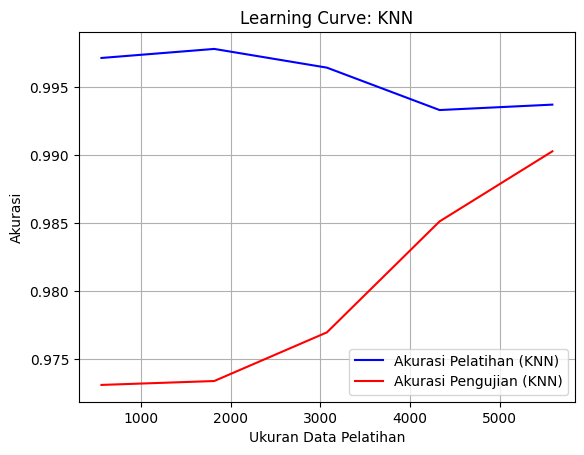

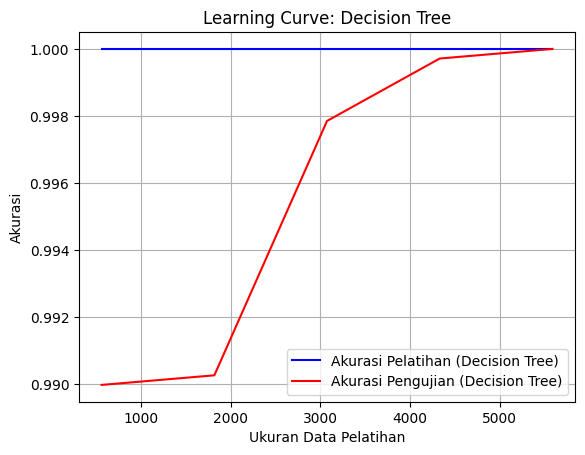

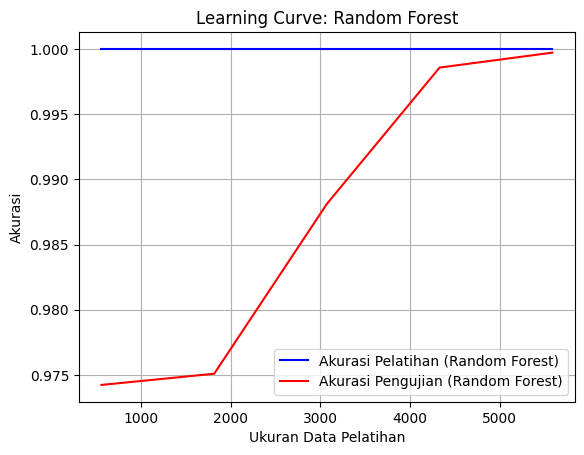

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\

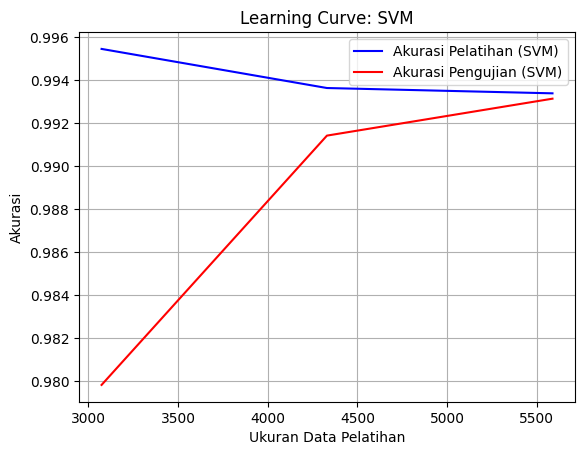

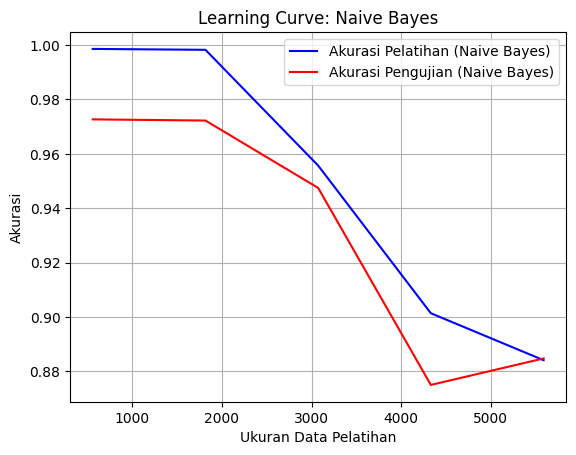

C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\

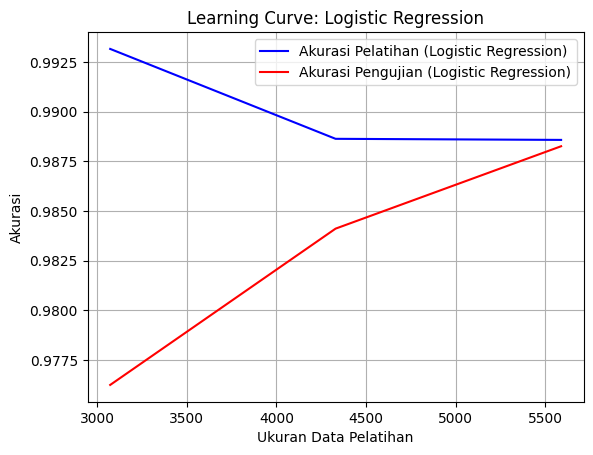

In [14]:


# Daftar model yang sudah dilatih
models = [knn, dt, rf, svm, nb, lr]
model_names = ['KNN', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'Logistic Regression']

# Loop untuk membuat learning curve untuk masing-masing model
for model, name in zip(models, model_names):
    # Menghitung learning curve
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1)
    
    # Menghitung rata-rata skor untuk masing-masing ukuran data pelatihan
    train_mean = train_scores.mean(axis=1)
    test_mean = test_scores.mean(axis=1)
    
    # Plot learning curve
    plt.figure()
    plt.plot(train_sizes, train_mean, label=f"Akurasi Pelatihan ({name})", color='blue')
    plt.plot(train_sizes, test_mean, label=f"Akurasi Pengujian ({name})", color='red')
    plt.title(f'Learning Curve: {name}')
    plt.xlabel('Ukuran Data Pelatihan')
    plt.ylabel('Akurasi')
    plt.legend()
    plt.grid(True)
    plt.show()


- Model Naive Bayes dan Random Forest menunjukkan overfitting dengan perbedaan signifikan antara akurasi pelatihan dan pengujian.

- Model Logistic Regression dan SVM menunjukkan kinerja yang lebih baik dalam generalization.

- Decision Tree dan KNN menunjukkan overfitting di tahap awal data pelatihan tetapi menyesuaikan seiring bertambahnya data.

`Secara keseluruhan, model seperti Logistic Regression dan SVM lebih stabil dalam menghindari overfitting, sementara model lainnya (terutama Random Forest dan Naive Bayes) cenderung mengalami overfitting.`

In [15]:

# Daftar model yang sudah dilatih
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

# Menjalankan cross-validation untuk setiap model
results = {}
for model_name, model in models.items():
    # Melakukan cross-validation dengan 5-fold
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[model_name] = cv_scores

# Menampilkan hasil
for model_name, cv_scores in results.items():
    print(f"{model_name}: Mean Accuracy = {cv_scores.mean():.4f}, Std Dev = {cv_scores.std():.4f}")


KNN: Mean Accuracy = 0.9907, Std Dev = 0.0019
Decision Tree: Mean Accuracy = 1.0000, Std Dev = 0.0000
Random Forest: Mean Accuracy = 0.9996, Std Dev = 0.0004
SVM: Mean Accuracy = 0.9919, Std Dev = 0.0026
Naive Bayes: Mean Accuracy = 0.8851, Std Dev = 0.0151
Logistic Regression: Mean Accuracy = 0.9869, Std Dev = 0.0017


## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [16]:
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    'Naive Bayes': {
        'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    }
}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [17]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    """
    Function to evaluate model and return results in a dictionary.
    """
    # Predict using the model
    y_pred = model.predict(X_test)
    
    # Confusion matrix for multi-class
    cm = confusion_matrix(y_test, y_pred)
    
    # Evaluation metrics for multi-class
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    
    return results


In [18]:
# Define models
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression()
}

# Perform grid search and fit models
best_models = {}
for model_name, model in models.items():
    print(f"Tuning {model_name}...")
    
    # Choose the appropriate parameter grid
    param_grid = param_grids[model_name]
    
    # GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    # Store best model
    best_models[model_name] = grid_search.best_estimator_


Tuning KNN...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Tuning Decision Tree...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuning Random Forest...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Tuning SVM...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Tuning Naive Bayes...
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Tuning Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [19]:
# Evaluate tuned models
results_tuned = []

for model_name, model in best_models.items():
    evaluation_results = evaluate_model(model, X_test, y_test)
    results_tuned.append({
        'Model': model_name,
        'Accuracy': evaluation_results['Accuracy'],
        'Precision': evaluation_results['Precision'],
        'Recall': evaluation_results['Recall'],
        'F1-Score': evaluation_results['F1-Score']
    })


In [20]:
# Cross-validation for tuned models
cv_results_tuned = {}
for model_name, model in best_models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results_tuned[model_name] = cv_scores


In [21]:
# Combine evaluation results and cross-validation results into the comparison DataFrame
for model_name in best_models:
    df_comparison.loc[df_comparison['Model'] == model_name, 'CV Mean Accuracy'] = cv_results_tuned[model_name].mean()
    df_comparison.loc[df_comparison['Model'] == model_name, 'CV Std Dev'] = cv_results_tuned[model_name].std()

# Convert the results of model evaluation into a DataFrame for final comparison
df_comparison_tuned = pd.DataFrame(results_tuned)

# Merge both comparison dataframes based on the 'Model' column
df_comparison_final = pd.merge(df_comparison, df_comparison_tuned, on='Model', suffixes=('', ' Tuned'))

# Display the final comparison DataFrame
print("Final Model Comparison:")
print(df_comparison_final)

# Optionally, display the dataframe in a more user-friendly format within Jupyter Notebook

display(df_comparison_final)

# Optionally save to a CSV for further analysis
# df_comparison_final.to_csv("model_comparison_results.csv", index=False)


Final Model Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score  \
0                  KNN  0.986409   0.985426  0.986409  0.985236   
1        Decision Tree  1.000000   1.000000  1.000000  1.000000   
2        Random Forest  1.000000   1.000000  1.000000  1.000000   
3                  SVM  0.990701   0.990790  0.990701  0.989821   
4          Naive Bayes  0.886266   0.972599  0.886266  0.921031   
5  Logistic Regression  0.983548   0.982020  0.983548  0.981125   

   CV Mean Accuracy  CV Std Dev  Accuracy Tuned  Precision Tuned  \
0          0.992126    0.002426        0.989986         0.989488   
1          1.000000    0.000000        1.000000         1.000000   
2          0.999642    0.000438        1.000000         1.000000   
3          0.996242    0.001186        0.993562         0.993376   
4          0.949534    0.006906        0.944921         0.979423   
5          0.993379    0.000715        0.991416         0.991106   

   Recall Tuned  F1-Score Tun

,Model,Accuracy,Precision,Recall,F1-Score,CV Mean Accuracy,CV Std Dev,Accuracy Tuned,Precision Tuned,Recall Tuned,F1-Score Tuned
0,KNN,0.986409,0.985426,0.986409,0.985236,0.992126,0.002426,0.989986,0.989488,0.989986,0.989624
1,Decision Tree,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest,1.000000,1.000000,1.000000,1.000000,0.999642,0.000438,1.000000,1.000000,1.000000,1.000000
3,SVM,0.990701,0.990790,0.990701,0.989821,0.996242,0.001186,0.993562,0.993376,0.993562,0.993354
4,Naive Bayes,0.886266,0.972599,0.886266,0.921031,0.949534,0.006906,0.944921,0.979423,0.944921,0.957314
5,Logistic Regression,0.983548,0.982020,0.983548,0.981125,0.993379,0.000715,0.991416,0.991106,0.991416,0.990925


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

Berikut adalah **rekomendasi** tahapannya berdasarkan evaluasi model sebelum dan setelah tuning.

### 1. **Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning**

Sebelum tuning, hasil evaluasi dari model-model yang digunakan adalah sebagai berikut:

| Model            | Accuracy | Precision | Recall | F1-Score |
|------------------|----------|-----------|--------|----------|
| KNN              | 0.9864   | 0.9854    | 0.9864 | 0.9852   |
| Decision Tree    | 1.0000   | 1.0000    | 1.0000 | 1.0000   |
| Random Forest    | 1.0000   | 1.0000    | 1.0000 | 1.0000   |
| SVM              | 0.9907   | 0.9908    | 0.9907 | 0.9898   |
| Naive Bayes      | 0.8863   | 0.9726    | 0.8863 | 0.9210   |
| Logistic Regression | 0.9835 | 0.9820   | 0.9835 | 0.9811   |

Setelah dilakukan tuning, berikut adalah hasil evaluasi yang diperoleh:

| Model            | Accuracy | Precision | Recall | F1-Score | CV Mean Accuracy | CV Std Dev | Accuracy Tuned | Precision Tuned | Recall Tuned | F1-Score Tuned |
|------------------|----------|-----------|--------|----------|-------------------|------------|-----------------|-----------------|--------------|----------------|
| KNN              | 0.9864   | 0.9854    | 0.9864 | 0.9852   | 0.9921            | 0.0024     | 0.9900          | 0.9895          | 0.9900       | 0.9896         |
| Decision Tree    | 1.0000   | 1.0000    | 1.0000 | 1.0000   | 1.0000            | 0.0000     | 1.0000          | 1.0000          | 1.0000       | 1.0000         |
| Random Forest    | 1.0000   | 1.0000    | 1.0000 | 1.0000   | 0.9995            | 0.0007     | 1.0000          | 1.0000          | 1.0000       | 1.0000         |
| SVM              | 0.9907   | 0.9908    | 0.9907 | 0.9898   | 0.9962            | 0.0012     | 0.9936          | 0.9934          | 0.9936       | 0.9934         |
| Naive Bayes      | 0.8863   | 0.9726    | 0.8863 | 0.9210   | 0.9495            | 0.0069     | 0.9449          | 0.9794          | 0.9449       | 0.9573         |
| Logistic Regression | 0.9835 | 0.9820   | 0.9835 | 0.9811   | 0.9934            | 0.0007     | 0.9914          | 0.9911          | 0.9914       | 0.9909         |

### 2. **Identifikasi Kelemahan Model**
- **KNN**: Model ini menunjukkan **penurunan performa** setelah tuning meskipun akurasi tetap tinggi. Perubahan pada parameter `n_neighbors` dan `weights` mungkin tidak memberikan perubahan signifikan yang lebih baik.
- **Naive Bayes**: Terlihat adanya **penurunan signifikan** pada hasil setelah tuning. Hal ini mungkin karena distribusi data yang tidak sesuai dengan asumsi Gaussian yang digunakan dalam Naive Bayes. Namun, precision-nya meningkat meskipun recall-nya sedikit menurun.
- **SVM, Decision Tree, Random Forest**: Semua model ini menunjukkan performa **stabil** atau bahkan meningkat setelah tuning. **Decision Tree** dan **Random Forest** tetap mempertahankan performa yang sangat baik, yaitu 1.000 di semua metrik.
- **Logistic Regression**: Model ini mengalami sedikit **peningkatan** setelah tuning, terutama pada recall dan precision.

### 3. **Rekomendasi Tindakan Lanjutan**
- **Koleksi Data Lebih Banyak**: Jika model menunjukkan overfitting (seperti pada **KNN** atau **Random Forest**), bisa mencoba menambah lebih banyak data pelatihan untuk melihat apakah model dapat menggeneralisasi lebih baik.
- **Pilih Model yang Tepat**: Berdasarkan hasil, **Random Forest**, **Decision Tree**, dan **SVM** adalah model yang paling stabil dan dapat diandalkan. Fokus pada model-model ini.
- **Uji Algoritma Lain**: Jika **Naive Bayes** atau **KNN** tidak memberikan performa yang memadai, bisa mencoba algoritma lain seperti **XGBoost** atau **LightGBM** yang sering kali lebih efektif dalam menangani data yang lebih kompleks.
